In [1]:
# !python3
# -*- coding:utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
import sklearn.model_selection
import math
# %matplotlib inline

# def loss_fuc(x,y,w,b):
#     #print (np.shape(x),np.shape(y),np.shape(w))
#
#     return loss,grad_w,grad_b

def optimizer(x,y,xvali,yvali,w,b,lr,n_estimator,C):
    n_sample,n_feature=np.shape(x)
    n_vali_sample,n_vali_feature=np.shape(xvali)
    loss_train=[]
    loss_vali=[]
    for i in range(n_estimator):
        # Hinge loss:
        tloss = 0.0
        vloss=0.0
        grad_w = 0.0
        grad_b = 0.0
        for _x, _y in zip(x, y):
            tmp = 1 - (_y * np.dot(_x, w) + b)
            if tmp >= 0:
                tloss += tmp
                grad_w += ((-_y) * _x).T
                grad_b += (-_y)
            else:
                tloss += 0.0
                grad_w += 0.0
                grad_b += 0.0
        for _vx,_vy in zip(xvali,yvali):
            vtmp = 1 - (_vy * np.dot(_vx, w) + b)
            if vtmp >= 0:
                vloss += vtmp
            else:
                vloss += 0.0
        norm=np.linalg.norm(w)**2
        tloss+=norm/2.0
        vloss+=norm/2.0
        tloss=tloss.mean()/n_sample
        vloss=vloss.mean()/n_vali_sample

        grad_w=(w+C*grad_w)
        grad_b=grad_b*C
        print ("[The %d iteration in train]: %f" % (i,tloss))
        print("[The %d iteration in validation]: %f" % (i,vloss))
        loss_train.append(tloss)
        loss_vali.append(vloss)
        #print ("pred:",np.shape(pred))
        # delta=pred - y
        #print ("delta:",np.shape(delta))
        #print (np.shape(w_gradient))
        w=w-lr*grad_w/n_sample
        b=b-lr*grad_b/n_sample
    return w,loss_train,loss_vali

def Linear_Classification(x,y,xvali,yvali):
    n_sample,n_feature=np.shape(x)
    # n_vali_sample,n_vali_feature=np.shape(xvali)
    lr=0.1
    w0=np.zeros(shape=(n_feature,1))
    b0=0.0
    C=0.5
    # x=np.append(np.ones(shape=(n_sample,1)),x,1)
    # xvali=np.append(np.ones(shape=(n_vali_sample,1)),xvali,1)
    n_estimator=400

    w,loss_train,loss_vali=optimizer(x,y,xvali,yvali,w0,b0,lr,n_estimator,C)
    return loss_train,loss_vali



In [2]:
X, y = sklearn.datasets.load_svmlight_file('../data/australian_scale')
X=X.todense()
l=len(y)
y=y.reshape(l,1)
#print ('X',X)
#print ('y',y)
X_train, X_vali, y_train, y_vali = sklearn.model_selection.train_test_split(X, y, random_state=1000)
#print ('x_vali:',X_vali)
loss_train,loss_vali=Linear_Classification(X_train,y_train,X_vali,y_vali)

[The 0 iteration in train]: 1.000000
[The 0 iteration in validation]: 1.000000
[The 1 iteration in train]: 0.960484
[The 1 iteration in validation]: 0.958723
[The 2 iteration in train]: 0.920982
[The 2 iteration in validation]: 0.917467
[The 3 iteration in train]: 0.881492
[The 3 iteration in validation]: 0.876233
[The 4 iteration in train]: 0.842015
[The 4 iteration in validation]: 0.835021
[The 5 iteration in train]: 0.802551
[The 5 iteration in validation]: 0.793831
[The 6 iteration in train]: 0.763099
[The 6 iteration in validation]: 0.752662
[The 7 iteration in train]: 0.723661
[The 7 iteration in validation]: 0.711515
[The 8 iteration in train]: 0.684236
[The 8 iteration in validation]: 0.670390
[The 9 iteration in train]: 0.644823
[The 9 iteration in validation]: 0.629575
[The 10 iteration in train]: 0.607854
[The 10 iteration in validation]: 0.594601
[The 11 iteration in train]: 0.580602
[The 11 iteration in validation]: 0.568599
[The 12 iteration in train]: 0.558706
[The 12 it

[The 111 iteration in train]: 0.284588
[The 111 iteration in validation]: 0.270912
[The 112 iteration in train]: 0.284513
[The 112 iteration in validation]: 0.270912
[The 113 iteration in train]: 0.284409
[The 113 iteration in validation]: 0.270880
[The 114 iteration in train]: 0.284337
[The 114 iteration in validation]: 0.270855
[The 115 iteration in train]: 0.284267
[The 115 iteration in validation]: 0.270832
[The 116 iteration in train]: 0.284199
[The 116 iteration in validation]: 0.270838
[The 117 iteration in train]: 0.284130
[The 117 iteration in validation]: 0.270845
[The 118 iteration in train]: 0.284062
[The 118 iteration in validation]: 0.270858
[The 119 iteration in train]: 0.283967
[The 119 iteration in validation]: 0.270844
[The 120 iteration in train]: 0.283902
[The 120 iteration in validation]: 0.270843
[The 121 iteration in train]: 0.283812
[The 121 iteration in validation]: 0.270845
[The 122 iteration in train]: 0.283721
[The 122 iteration in validation]: 0.270847
[The

[The 214 iteration in train]: 0.282293
[The 214 iteration in validation]: 0.271486
[The 215 iteration in train]: 0.282177
[The 215 iteration in validation]: 0.271404
[The 216 iteration in train]: 0.282182
[The 216 iteration in validation]: 0.271426
[The 217 iteration in train]: 0.282109
[The 217 iteration in validation]: 0.271383
[The 218 iteration in train]: 0.282379
[The 218 iteration in validation]: 0.271466
[The 219 iteration in train]: 0.282092
[The 219 iteration in validation]: 0.271264
[The 220 iteration in train]: 0.282185
[The 220 iteration in validation]: 0.271340
[The 221 iteration in train]: 0.282050
[The 221 iteration in validation]: 0.271235
[The 222 iteration in train]: 0.282245
[The 222 iteration in validation]: 0.271330
[The 223 iteration in train]: 0.282013
[The 223 iteration in validation]: 0.271158
[The 224 iteration in train]: 0.282312
[The 224 iteration in validation]: 0.271269
[The 225 iteration in train]: 0.281940
[The 225 iteration in validation]: 0.271056
[The

[The 323 iteration in train]: 0.276128
[The 323 iteration in validation]: 0.265492
[The 324 iteration in train]: 0.276914
[The 324 iteration in validation]: 0.265733
[The 325 iteration in train]: 0.275948
[The 325 iteration in validation]: 0.265281
[The 326 iteration in train]: 0.276647
[The 326 iteration in validation]: 0.265506
[The 327 iteration in train]: 0.275786
[The 327 iteration in validation]: 0.265159
[The 328 iteration in train]: 0.276453
[The 328 iteration in validation]: 0.265361
[The 329 iteration in train]: 0.275633
[The 329 iteration in validation]: 0.265014
[The 330 iteration in train]: 0.276317
[The 330 iteration in validation]: 0.265217
[The 331 iteration in train]: 0.275488
[The 331 iteration in validation]: 0.264883
[The 332 iteration in train]: 0.276249
[The 332 iteration in validation]: 0.265139
[The 333 iteration in train]: 0.275361
[The 333 iteration in validation]: 0.264757
[The 334 iteration in train]: 0.276319
[The 334 iteration in validation]: 0.265150
[The

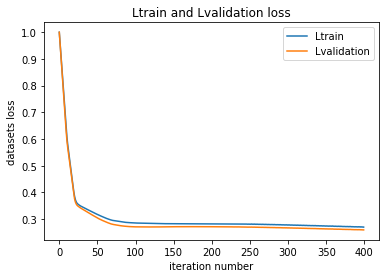

In [3]:
plt.plot(loss_train,label='Ltrain')
plt.plot(loss_vali,label='Lvalidation')
plt.title('Ltrain and Lvalidation loss')
plt.xlabel('iteration number')
plt.ylabel('datasets loss')
plt.legend()
plt.show()